In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
# read in the metadata for astrocytoma
metadata = pd.read_csv('interesting_metadata_for_astrocytoma_vs_normal.csv')
metadata = metadata[["Unnamed: 0", "tumor"]]
metadata.rename(columns={'Unnamed: 0':'sample_name'}, inplace=True)
metadata = metadata.set_index('sample_name', drop=False).rename_axis(None)
metadata = metadata.iloc[: , 1:]
metadata

,tumor
GSM2899178,astrocytoma
GSM2899179,astrocytoma
GSM2899180,astrocytoma
GSM2899181,astrocytoma
GSM2899182,astrocytoma
...,...
GSM97937,astrocytoma
GSM97941,astrocytoma
GSM97943,astrocytoma
GSM97958,astrocytoma


In [ ]:
metadata["tumor"].value_counts()

astrocytoma    167
normal          51
Name: tumor, dtype: int64

In [ ]:
# read in the expression values for astrocytoma
df = pd.read_csv('interesting_genes_expressions_for_astrocytoma_vs_normal.csv')
df = df.drop(columns={'Unnamed: 0'})
df_transposed = df.T
df_transposed = df_transposed.rename(columns=df_transposed.iloc[218])
df_transposed.drop(index=df_transposed.index[218], 
        axis=0, 
        inplace=True)
frames = [metadata, df_transposed]
df = pd.concat(frames, axis=1)
df

,tumor,CREG2,RXFP1,ARPP21,SLC39A12,RBFOX1,DNAJA4,OLFM3,OLFM3,MYT1L,...,GABRA1,HTR2A,RAB3C,NaN,KCNQ5,NEFH,PHF24,PPP1R16B,SHISAL1,FERMT1
GSM2899178,astrocytoma,6.333002,4.808679,4.18259,5.234557,7.883327,4.374775,5.278415,4.861743,5.275747,...,6.650733,5.462042,6.36318,10.889148,7.939272,5.776776,6.386183,6.653625,7.924135,10.602226
GSM2899179,astrocytoma,5.940178,5.041461,4.381819,6.428453,7.440704,4.981632,5.40494,4.898408,5.028062,...,7.364148,5.552365,5.871922,10.126393,6.156109,6.425945,6.270442,6.320287,6.463994,7.222421
GSM2899180,astrocytoma,6.297498,5.007448,4.823922,5.316725,9.909314,6.494634,6.993744,6.082125,7.875789,...,10.607552,5.386285,7.556438,9.800518,5.708078,8.224833,6.679088,9.845503,7.299382,8.218685
GSM2899181,astrocytoma,6.291672,4.773659,4.287835,6.463647,8.093616,5.39355,5.395979,5.093254,5.345478,...,7.070293,5.570899,6.426237,10.855844,7.688511,5.629402,6.358968,7.09821,6.218254,10.501273
GSM2899182,astrocytoma,6.210005,4.957037,4.293757,5.691838,8.014946,4.540043,5.677879,4.955618,5.603473,...,7.239413,5.612098,6.841084,10.910485,7.200371,6.066338,6.672696,7.542397,6.993956,10.840846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM97937,astrocytoma,5.727782,5.22689,4.589047,9.101085,7.376488,4.444256,5.773927,4.636598,4.955285,...,7.595932,5.953447,5.302745,10.604148,5.272769,5.732561,6.57272,8.136996,7.353564,10.321293
GSM97941,astrocytoma,8.087553,7.104717,6.085525,9.356834,10.26097,6.199475,8.269022,7.366215,8.355024,...,10.944085,8.790729,8.390767,8.618503,9.142403,9.632305,8.371467,9.654372,8.858492,7.332834
GSM97943,astrocytoma,5.479639,5.688575,5.088512,8.060022,7.734439,5.492292,5.846326,5.004469,5.376703,...,7.751829,6.257384,6.507641,9.859424,6.259931,8.720351,6.508041,9.324401,7.245471,7.333974
GSM97958,astrocytoma,7.534782,5.636552,5.216066,9.459388,9.099496,6.465141,7.21763,6.493641,6.651718,...,9.215982,7.481777,6.63868,10.408253,7.346652,7.757082,7.477949,8.206712,7.798445,7.911484


In [ ]:
df.isnull().sum()

tumor       0
CREG2       0
RXFP1       0
ARPP21      0
SLC39A12    0
           ..
NEFH        0
PHF24       0
PPP1R16B    0
SHISAL1     0
FERMT1      0
Length: 478, dtype: int64

In [ ]:
print('Missing values: ',sum(df.isnull().sum()))

Missing values:  0


In [ ]:
# Encoding categorical values

df['tumor'] = df['tumor'].replace({'normal':0,'astrocytoma':1,'Other':-1}).astype(np.uint8)

In [ ]:
# Inverse of Null Accuracy
print('Inverse of Null Accuracy: ',51/(51+167))
print('Null Accuracy: ',167/(167+51))

Inverse of Null Accuracy:  0.23394495412844038
Null Accuracy:  0.7660550458715596


In [ ]:
df.reset_index(inplace=True)
df

,index,tumor,CREG2,RXFP1,ARPP21,SLC39A12,RBFOX1,DNAJA4,OLFM3,OLFM3,...,GABRA1,HTR2A,RAB3C,NaN,KCNQ5,NEFH,PHF24,PPP1R16B,SHISAL1,FERMT1
0,GSM2899178,1,6.333002,4.808679,4.18259,5.234557,7.883327,4.374775,5.278415,4.861743,...,6.650733,5.462042,6.36318,10.889148,7.939272,5.776776,6.386183,6.653625,7.924135,10.602226
1,GSM2899179,1,5.940178,5.041461,4.381819,6.428453,7.440704,4.981632,5.40494,4.898408,...,7.364148,5.552365,5.871922,10.126393,6.156109,6.425945,6.270442,6.320287,6.463994,7.222421
2,GSM2899180,1,6.297498,5.007448,4.823922,5.316725,9.909314,6.494634,6.993744,6.082125,...,10.607552,5.386285,7.556438,9.800518,5.708078,8.224833,6.679088,9.845503,7.299382,8.218685
3,GSM2899181,1,6.291672,4.773659,4.287835,6.463647,8.093616,5.39355,5.395979,5.093254,...,7.070293,5.570899,6.426237,10.855844,7.688511,5.629402,6.358968,7.09821,6.218254,10.501273
4,GSM2899182,1,6.210005,4.957037,4.293757,5.691838,8.014946,4.540043,5.677879,4.955618,...,7.239413,5.612098,6.841084,10.910485,7.200371,6.066338,6.672696,7.542397,6.993956,10.840846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,GSM97937,1,5.727782,5.22689,4.589047,9.101085,7.376488,4.444256,5.773927,4.636598,...,7.595932,5.953447,5.302745,10.604148,5.272769,5.732561,6.57272,8.136996,7.353564,10.321293
214,GSM97941,1,8.087553,7.104717,6.085525,9.356834,10.26097,6.199475,8.269022,7.366215,...,10.944085,8.790729,8.390767,8.618503,9.142403,9.632305,8.371467,9.654372,8.858492,7.332834
215,GSM97943,1,5.479639,5.688575,5.088512,8.060022,7.734439,5.492292,5.846326,5.004469,...,7.751829,6.257384,6.507641,9.859424,6.259931,8.720351,6.508041,9.324401,7.245471,7.333974
216,GSM97958,1,7.534782,5.636552,5.216066,9.459388,9.099496,6.465141,7.21763,6.493641,...,9.215982,7.481777,6.63868,10.408253,7.346652,7.757082,7.477949,8.206712,7.798445,7.911484


In [ ]:
# get the x values and y values
X = df.drop(['tumor', 'index'], axis=1)
y = df['tumor']

from sklearn.model_selection import train_test_split

# split the data with 70-30 train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [ ]:
# import more libraries for neural networks
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Models

# Scale our data in pipeline, then split

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(random_state=42))])
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(random_state=42))])
logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(random_state=42))])
knn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('KNN',KNeighborsClassifier())])
dt_pipeline = Pipeline(steps = [('scale',StandardScaler()),('DT',DecisionTreeClassifier())])
nn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('NN',MLPClassifier())])

In [ ]:
# do cross validation
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score

rf_cv = cross_val_score(rf_pipeline,X_train,y_train,cv=10,scoring='f1')
svm_cv = cross_val_score(svm_pipeline,X_train,y_train,cv=10,scoring='f1')
logreg_cv = cross_val_score(logreg_pipeline,X_train,y_train,cv=10,scoring='f1')
knn_cv = cross_val_score(knn_pipeline,X_train,y_train,cv=10,scoring='f1')
dt_cv = cross_val_score(dt_pipeline,X_train,y_train,cv=10,scoring='f1')
nn_cv = cross_val_score(nn_pipeline,X_train,y_train,cv=10,scoring='f1')

In [ ]:
# get the mean F1 scores
import warnings
warnings.filterwarnings("ignore")

print('Mean f1 scores:')
print('Random Forest mean :',cross_val_score(rf_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('SVM mean :',cross_val_score(svm_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('Logistic Regression mean :',cross_val_score(logreg_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('KNN mean :',cross_val_score(knn_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('Decision Tree mean :',cross_val_score(dt_pipeline,X_train,y_train,cv=10,scoring='f1').mean())
print('Neural Network mean :',cross_val_score(nn_pipeline,X_train,y_train,cv=10,scoring='f1').mean())

Mean f1 scores:
Random Forest mean : 0.9888888888888889
SVM mean : 1.0
Logistic Regression mean : 1.0
KNN mean : 1.0
Decision Tree mean : 0.9636363636363636
Neural Network mean : 0.9777777777777779


In [ ]:
# fit all models to the data 
rf_pipeline.fit(X_train,y_train)
svm_pipeline.fit(X_train,y_train)
logreg_pipeline.fit(X_train,y_train)
knn_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)
nn_pipeline.fit(X_train, y_train)

rf_pred = rf_pipeline.predict(X_test)
svm_pred = svm_pipeline.predict(X_test)
logreg_pred = logreg_pipeline.predict(X_test)
knn_pred = knn_pipeline.predict(X_test)
dt_pred = knn_pipeline.predict(X_test)
nn_pred = knn_pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix

# get all confusion matrices
rf_cm  = confusion_matrix(y_test,rf_pred )
svm_cm = confusion_matrix(y_test,svm_pred)
logreg_cm  = confusion_matrix(y_test,logreg_pred )
knn_cm = confusion_matrix(y_test, knn_pred)
dt_cm = confusion_matrix(y_test, dt_pred)
nn_cm = confusion_matrix(y_test, nn_pred)

from sklearn.metrics import f1_score

rf_f1  = f1_score(y_test,rf_pred)
svm_f1 = f1_score(y_test,svm_pred)
logreg_f1  = f1_score(y_test,logreg_pred)
knn_f1 = f1_score(y_test, knn_pred)
dt_f1 = f1_score(y_test, dt_pred)
nn_f1 = f1_score(y_test, nn_pred)

In [ ]:
# get the new F1 scores
print('Mean f1 scores:')

print('RF mean :',rf_f1)
print('SVM mean :',svm_f1)
print('LR mean :',logreg_f1)
print('KNN mean :', knn_f1)
print('DT mean :', dt_f1)
print('NN mean :', nn_f1)

Mean f1 scores:
RF mean : 0.9707112970711297
SVM mean : 0.975
LR mean : 0.975
KNN mean : 0.9707112970711297
DT mean : 0.9707112970711297
NN mean : 0.9707112970711297


In [ ]:
# get all the performance data for each 
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

print("Random Forest. ")
print(classification_report(y_test,rf_pred))

print('Accuracy Score: ', accuracy_score(y_test,rf_pred))

print("SVM. ")
print(classification_report(y_test,svm_pred))

print('Accuracy Score: ', accuracy_score(y_test,svm_pred))

print("Logistic Regression. ")
print(classification_report(y_test,logreg_pred))

print('Accuracy Score: ', accuracy_score(y_test,logreg_pred))

print("KNN. ")
print(classification_report(y_test,knn_pred))

print('Accuracy Score: ', accuracy_score(y_test,knn_pred))

Random Forest. 
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.97      0.97      0.97       120

    accuracy                           0.95       153
   macro avg       0.93      0.94      0.93       153
weighted avg       0.95      0.95      0.95       153

Accuracy Score:  0.954248366013072
SVM. 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.97      0.97      0.97       120

    accuracy                           0.96       153
   macro avg       0.94      0.94      0.94       153
weighted avg       0.96      0.96      0.96       153

Accuracy Score:  0.9607843137254902
Logistic Regression. 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.97      0.97      0.97       120

    accuracy                           0.96       153
   macro avg 

In [ ]:
# import GridSearchCV for best params for each model 
from sklearn.model_selection import GridSearchCV

# random forest classifier
n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
# fit the random forest classifier
grid = GridSearchCV(rfc,param_grid)

grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 5, 7],
                         'n_estimators': [64, 100, 128, 200]})

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 1.0000


Parameters that give the best results : 

 {'bootstrap': True, 'max_features': 2, 'n_estimators': 64}


Estimator that was chosen by the search : 

 RandomForestClassifier(max_features=2, n_estimators=64)


In [ ]:
# Let's use those params now

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),('RF',RandomForestClassifier(max_features=2, n_estimators=64))])

rf_pipeline.fit(X_train,y_train)

rf_tuned_pred = rf_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,rf_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rf_tuned_pred))
print('F1 Score: ',f1_score(y_test,rf_tuned_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.97      0.97      0.97       120

    accuracy                           0.95       153
   macro avg       0.93      0.94      0.93       153
weighted avg       0.95      0.95      0.95       153

Accuracy Score:  0.954248366013072
F1 Score:  0.9707112970711297


In [ ]:
# do logistic regression now
penalty = ['l1','l2']
C = [0.001, 0.01, 0.1, 1, 10, 100] 

log_param_grid = {'penalty': penalty, 
                  'C': C}
logreg = LogisticRegression()
grid = GridSearchCV(logreg,log_param_grid)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 1.0000


Parameters that give the best results : 

 {'C': 0.001, 'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(C=0.001)


In [ ]:
grid.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [ ]:
# Let's use those params now

logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=0.001))])

logreg_pipeline.fit(X_train,y_train)

logreg.fit(X_train,y_train)

logreg_tuned_pred = logreg_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,logreg_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,logreg_tuned_pred))
print('F1 Score: ',f1_score(y_test,logreg_tuned_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.97      0.97      0.97       120

    accuracy                           0.95       153
   macro avg       0.93      0.94      0.93       153
weighted avg       0.95      0.95      0.95       153

Accuracy Score:  0.954248366013072
F1 Score:  0.9707112970711297


In [ ]:
# do SVMs now
svm_param_grid = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

svm = SVC(random_state=42)

# grid = GridSearchCV(svm,svm_param_grid)

grid = GridSearchCV(estimator = svm,  
                           param_grid = svm_param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 1.0000


Parameters that give the best results : 

 {'C': 1, 'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=1, kernel='linear', random_state=42)


In [ ]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
# use these new params now
svm_pipeline = Pipeline(steps = [('scale',StandardScaler()),('SVM',SVC(C=1,kernel='linear',random_state=42))])

svm_pipeline.fit(X_train,y_train)

svm_tuned_pred = svm_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,svm_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,svm_tuned_pred))
print('F1 Score: ',f1_score(y_test,svm_tuned_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.98      0.97      0.98       120

    accuracy                           0.97       153
   macro avg       0.95      0.96      0.95       153
weighted avg       0.97      0.97      0.97       153

Accuracy Score:  0.9673202614379085
F1 Score:  0.9790794979079498


In [ ]:
# next up is k-nearest-neighbors
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 1.0000


Parameters that give the best results : 

 {'n_neighbors': 3}


Estimator that was chosen by the search : 

 KNeighborsClassifier(n_neighbors=3)


In [ ]:
# using the optimal parameters
knn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('KNN',KNeighborsClassifier(n_neighbors=3))])

knn_pipeline.fit(X_train,y_train)

knn_tuned_pred = knn_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,knn_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,knn_tuned_pred))
print('F1 Score: ',f1_score(y_test,knn_tuned_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.97      0.97      0.97       120

    accuracy                           0.96       153
   macro avg       0.94      0.94      0.94       153
weighted avg       0.96      0.96      0.96       153

Accuracy Score:  0.9607843137254902
F1 Score:  0.975


In [ ]:
# next up is decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10), 'min_samples_split': range(1,10), 
          'min_samples_leaf': range(1,5)}

grid = GridSearchCV(dt, params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 0.9857


Parameters that give the best results : 

 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(max_depth=1, random_state=42)


In [ ]:
# lets use these params now
dt_pipeline = Pipeline(steps = [('scale',StandardScaler()),('DT',DecisionTreeClassifier(max_depth=1, random_state=42))])

dt_pipeline.fit(X_train,y_train)

dt_tuned_pred = dt_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,dt_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,dt_tuned_pred))
print('F1 Score: ',f1_score(y_test,dt_tuned_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.96      0.97      0.96       120

    accuracy                           0.94       153
   macro avg       0.92      0.91      0.91       153
weighted avg       0.94      0.94      0.94       153

Accuracy Score:  0.9411764705882353
F1 Score:  0.9626556016597511


In [ ]:
# using a multilayer perceptron neural network
mlp = MLPClassifier(random_state=42)

params = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 
              'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 
              'random_state':[0,1,2,3,4,5,6,7,8,9]}

grid = GridSearchCV(mlp, params, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 4950 candidates, totalling 49500 fits


KeyboardInterrupt: ignored

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid.best_estimator_))

GridSearch CV best score : 1.0000


Parameters that give the best results : 

 {'alpha': 0.1, 'hidden_layer_sizes': 10, 'max_iter': 1000, 'random_state': 0, 'solver': 'lbfgs'}


Estimator that was chosen by the search : 

 MLPClassifier(alpha=0.1, hidden_layer_sizes=10, max_iter=1000, random_state=0,
              solver='lbfgs')


In [ ]:
# lets use these params now
nn_pipeline = Pipeline(steps = [('scale',StandardScaler()),('NN',MLPClassifier(alpha=0.1, hidden_layer_sizes=10, max_iter=1000, random_state=0,
              solver='lbfgs'))])

nn_pipeline.fit(X_train,y_train)

nn_tuned_pred = nn_pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test,nn_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,nn_tuned_pred))
print('F1 Score: ',f1_score(y_test,nn_tuned_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.98      0.97      0.98       120

    accuracy                           0.97       153
   macro avg       0.95      0.96      0.95       153
weighted avg       0.97      0.97      0.97       153

Accuracy Score:  0.9673202614379085
F1 Score:  0.9790794979079498


In [ ]:
# fit all of these new networks
rf_pipeline.fit(X_train,y_train)
svm_pipeline.fit(X_train,y_train)
logreg_pipeline.fit(X_train,y_train)
knn_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)
nn_pipeline.fit(X_train, y_train)

rf_pred = rf_pipeline.predict(X_test)
svm_pred = svm_pipeline.predict(X_test)
logreg_pred = logreg_pipeline.predict(X_test)
knn_pred = knn_pipeline.predict(X_test)
dt_pred = knn_pipeline.predict(X_test)
nn_pred = knn_pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix

# create new confusion matrices
rf_cm  = confusion_matrix(y_test,rf_pred )
svm_cm = confusion_matrix(y_test,svm_pred)
logreg_cm  = confusion_matrix(y_test,logreg_pred )
knn_cm = confusion_matrix(y_test, knn_pred)
dt_cm = confusion_matrix(y_test, dt_pred)
nn_cm = confusion_matrix(y_test, nn_pred)

from sklearn.metrics import f1_score

rf_f1  = f1_score(y_test,rf_pred)
svm_f1 = f1_score(y_test,svm_pred)
logreg_f1  = f1_score(y_test,logreg_pred)
knn_f1 = f1_score(y_test, knn_pred)
dt_f1 = f1_score(y_test, dt_pred)
nn_f1 = f1_score(y_test, nn_pred)

In [ ]:
# Make dataframes to plot

from sklearn.metrics import recall_score, precision_score, roc_auc_score

rf_df = pd.DataFrame(data=[f1_score(y_test,rf_pred),accuracy_score(y_test, rf_pred), recall_score(y_test, rf_pred),
                   precision_score(y_test, rf_pred), roc_auc_score(y_test, rf_pred)], 
             columns=['Random Forest Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

svm_df = pd.DataFrame(data=[f1_score(y_test,svm_pred),accuracy_score(y_test, svm_pred), recall_score(y_test, svm_pred),
                   precision_score(y_test, svm_pred), roc_auc_score(y_test, svm_pred)], 
             columns=['Support Vector Machine (SVM) Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

lr_df = pd.DataFrame(data=[f1_score(y_test,logreg_tuned_pred),accuracy_score(y_test, logreg_tuned_pred), recall_score(y_test, logreg_tuned_pred),
                   precision_score(y_test, logreg_tuned_pred), roc_auc_score(y_test, logreg_tuned_pred)], 
             columns=['Tuned Logistic Regression Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

knn_df = pd.DataFrame(data=[f1_score(y_test,knn_tuned_pred),accuracy_score(y_test, knn_tuned_pred), recall_score(y_test, knn_tuned_pred),
                   precision_score(y_test, knn_tuned_pred), roc_auc_score(y_test, knn_tuned_pred)], 
             columns=['K-Nearest-Neighbors Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

dt_df = pd.DataFrame(data=[f1_score(y_test,dt_tuned_pred),accuracy_score(y_test, dt_tuned_pred), recall_score(y_test, dt_tuned_pred),
                   precision_score(y_test, dt_tuned_pred), roc_auc_score(y_test, dt_tuned_pred)], 
             columns=['Decision Tree Classifier Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

nn_df = pd.DataFrame(data=[f1_score(y_test,nn_tuned_pred),accuracy_score(y_test, nn_tuned_pred), recall_score(y_test, nn_tuned_pred),
                   precision_score(y_test, nn_tuned_pred), roc_auc_score(y_test, nn_tuned_pred)], 
             columns=['Multilayer Perceptron Neural Network Score'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

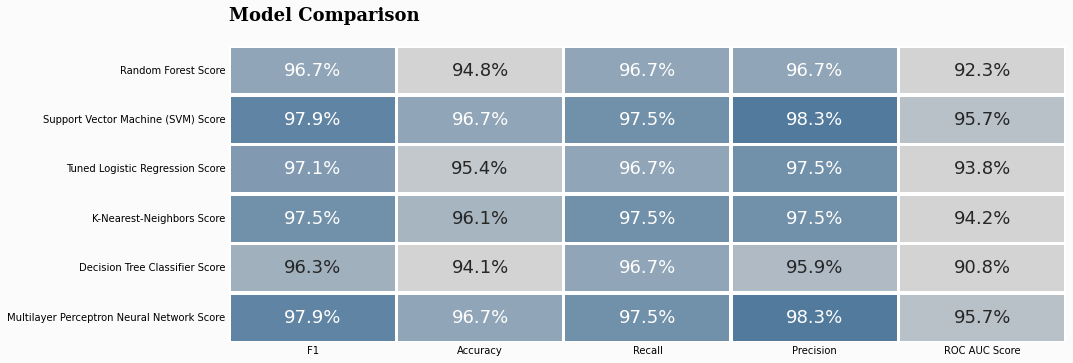

In [ ]:
# create a full figure
df_models = round(pd.concat([rf_df,svm_df,lr_df,knn_df, dt_df, nn_df], axis=1),3)
import matplotlib
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(15,30)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0.90,vmax=1, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":18})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-0.5,'Model Comparison',fontsize=18,fontweight='bold',fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

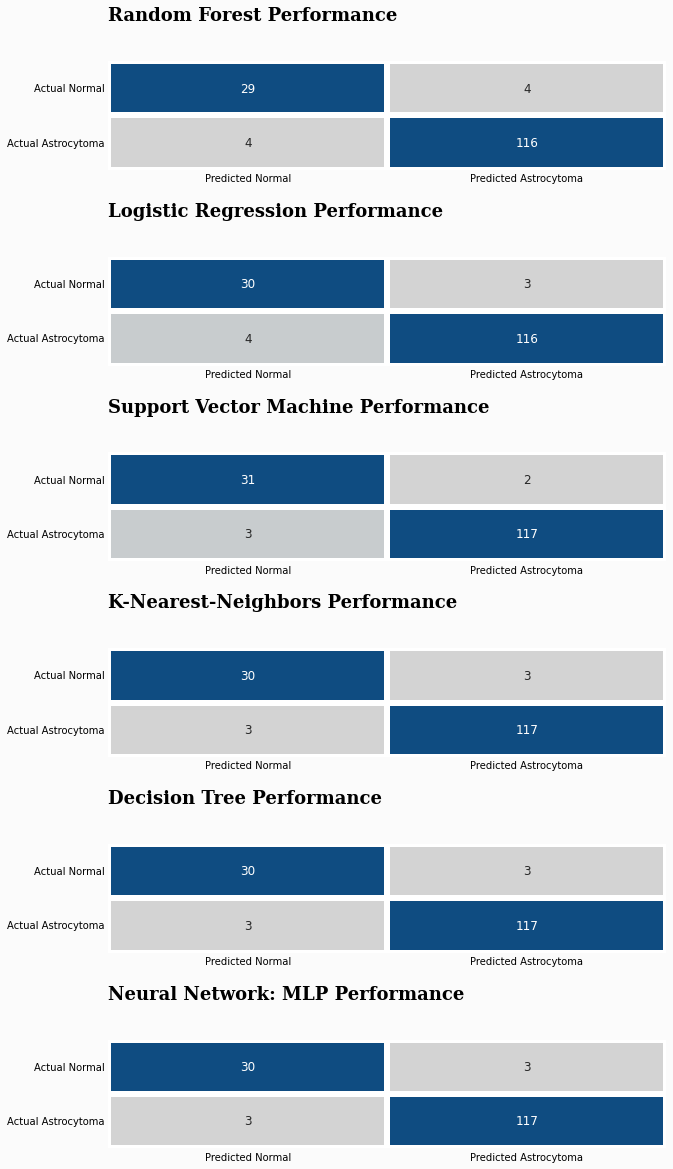

In [ ]:
# Plotting our results

colors = ["lightgray","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,20)) # create figure
gs = fig.add_gridspec(6, 2)
gs.update(wspace=0.1, hspace=0.8)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, :])
ax2 = fig.add_subplot(gs[2, :])
ax3 = fig.add_subplot(gs[3, :])
ax4 = fig.add_subplot(gs[4, :])
ax5 = fig.add_subplot(gs[5, :])
ax0.set_facecolor(background_color) # axes background color

# Overall
sns.heatmap(rf_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax0,
            yticklabels=['Actual Normal','Actual Astrocytoma'],xticklabels=['Predicted Normal','Predicted Astrocytoma'],annot_kws={"fontsize":12})

sns.heatmap(logreg_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax1,
            yticklabels=['Actual Normal','Actual Astrocytoma'],xticklabels=['Predicted Normal','Predicted Astrocytoma'],annot_kws={"fontsize":12})

sns.heatmap(svm_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax2,
            yticklabels=['Actual Normal','Actual Astrocytoma'],xticklabels=['Predicted Normal','Predicted Astrocytoma'],annot_kws={"fontsize":12})

sns.heatmap(knn_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax3,
            yticklabels=['Actual Normal','Actual Astrocytoma'],xticklabels=['Predicted Normal','Predicted Astrocytoma'],annot_kws={"fontsize":12})

sns.heatmap(dt_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax4,
            yticklabels=['Actual Normal','Actual Astrocytoma'],xticklabels=['Predicted Normal','Predicted Astrocytoma'],annot_kws={"fontsize":12})

sns.heatmap(nn_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax5,
            yticklabels=['Actual Normal','Actual Astrocytoma'],xticklabels=['Predicted Normal','Predicted Astrocytoma'],annot_kws={"fontsize":12})

ax0.tick_params(axis=u'both', which=u'both',length=0)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 
ax1.tick_params(axis=u'both', which=u'both',length=0)
ax1.set_facecolor(background_color) 
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax2.set_facecolor(background_color)
ax3.tick_params(axis=u'both', which=u'both',length=0)
ax3.set_facecolor(background_color)
ax4.tick_params(axis=u'both', which=u'both',length=0)
ax4.set_facecolor(background_color)
ax5.tick_params(axis=u'both', which=u'both',length=0)
ax5.set_facecolor(background_color)

ax0.text(0,-0.75,'Random Forest Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax1.text(0,-0.75,'Logistic Regression Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax2.text(0,-0.75,'Support Vector Machine Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax3.text(0,-0.75,'K-Nearest-Neighbors Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax4.text(0,-0.75,'Decision Tree Performance',fontsize=18,fontweight='bold',fontfamily='serif')

ax5.text(0,-0.75,'Neural Network: MLP Performance',fontsize=18,fontweight='bold',fontfamily='serif')

plt.show()